In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/data/online_retail.csv")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2022 8.26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2022 8.26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2022 8.26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2022 8.26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2022 8.26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2023 12.50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2023 12.50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2023 12.50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2023 12.50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2023 12.50,4.95,12680.0,France


In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
df = df[~df.CustomerID.isnull()]

In [11]:
df = df[~df.InvoiceNo.astype(str).str.startswith('C')]

In [12]:
df = df[(df["Quantity"] )& (df["UnitPrice"] > 0)]

In [13]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [14]:
df.shape

(117378, 9)

In [15]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
15,536367,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,01-12-2022 8.34,4.95,13047.0,United Kingdom,14.85
17,536367,21754,HOME BUILDING BLOCK WORD,3,01-12-2022 8.34,5.95,13047.0,United Kingdom,17.85
18,536367,21755,LOVE BUILDING BLOCK WORD,3,01-12-2022 8.34,5.95,13047.0,United Kingdom,17.85
22,536368,22913,RED COAT RACK PARIS FASHION,3,01-12-2022 8.34,4.95,13047.0,United Kingdom,14.85
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,01-12-2022 8.34,4.95,13047.0,United Kingdom,14.85
...,...,...,...,...,...,...,...,...,...
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,09-12-2023 12.20,1.45,12748.0,United Kingdom,1.45
541859,581580,37500,TEA TIME TEAPOT IN GIFT BOX,1,09-12-2023 12.20,4.95,12748.0,United Kingdom,4.95
541878,581585,23356,LOVE HOT WATER BOTTLE,3,09-12-2023 12.31,5.95,15804.0,United Kingdom,17.85
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,09-12-2023 12.31,0.42,15804.0,United Kingdom,10.50


In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H.%M', errors='coerce')


In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
15,536367,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,2022-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85
17,536367,21754,HOME BUILDING BLOCK WORD,3,2022-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85
18,536367,21755,LOVE BUILDING BLOCK WORD,3,2022-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85
22,536368,22913,RED COAT RACK PARIS FASHION,3,2022-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,2022-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85


EDA

/tmp/ipython-input-3800985246.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('InvoiceDate').resample('M')['InvoiceNo'].nunique().plot(kind='line', figsize=(10,4))


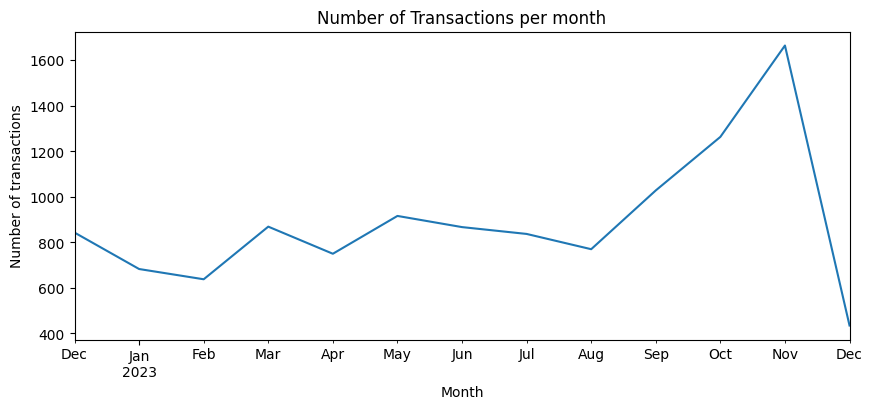

In [18]:
df.set_index('InvoiceDate').resample('M')['InvoiceNo'].nunique().plot(kind='line', figsize=(10,4))
plt.title("Number of Transactions per month")
plt.xlabel("Month")
plt.ylabel("Number of transactions")
plt.show()

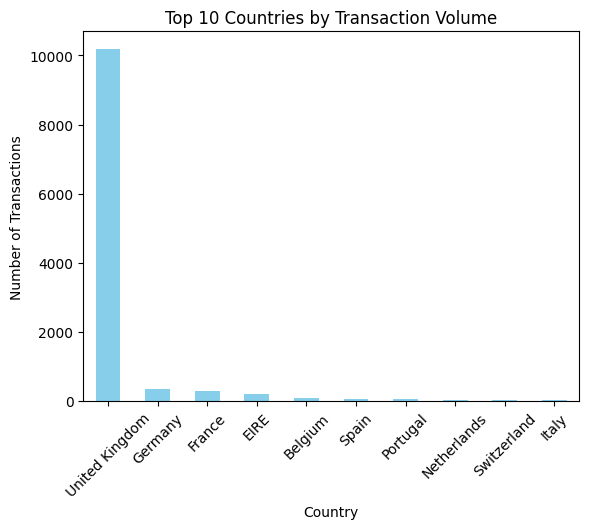

In [19]:
# Count number of unique InvoiceNo per country (i.e., transaction volume)
country_sales = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

# Plot Top 10 Countries by Transaction Volume
country_sales.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Transaction Volume")
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


Top 10 Best Selling Products

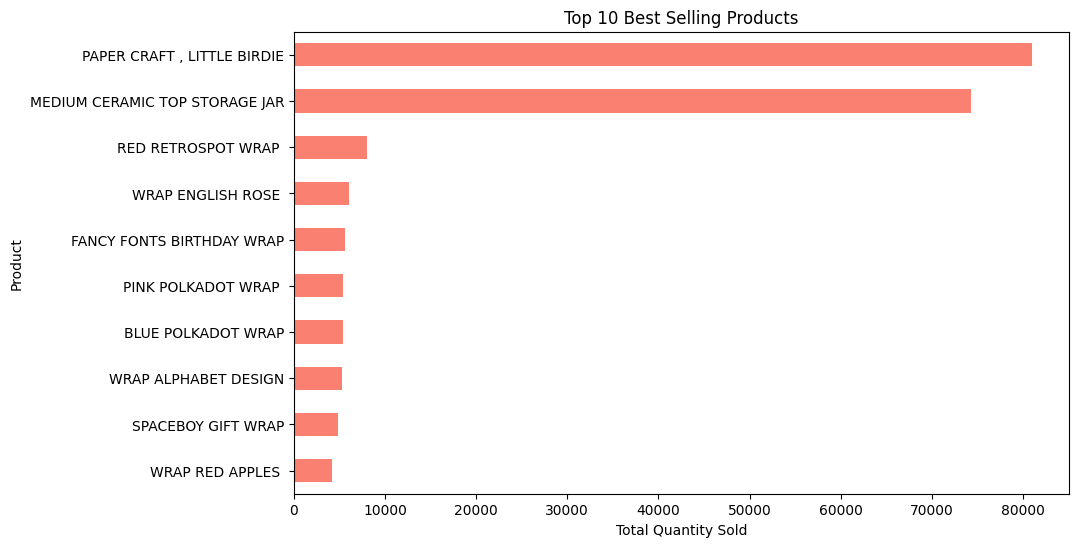

In [20]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='salmon')
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.show()

Invoice Amount Distribution

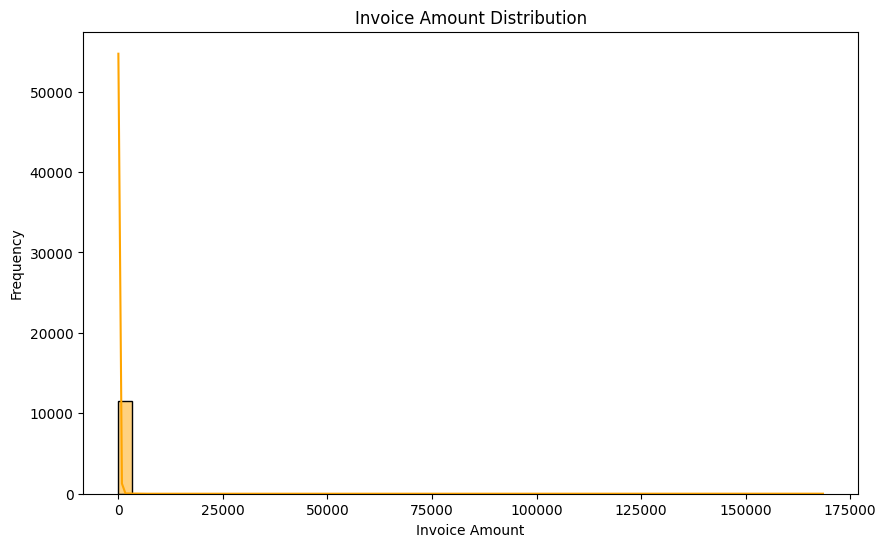

In [21]:
df['InvoiceAmount'] = df.groupby('InvoiceNo')['TotalPrice'].transform('sum')
invoice_amount_dist = df[['InvoiceNo', 'InvoiceAmount']].drop_duplicates()['InvoiceAmount']
plt.figure(figsize=(10, 6))
sns.histplot(invoice_amount_dist, bins=50, kde=True, color='orange')
plt.title("Invoice Amount Distribution")
plt.xlabel("Invoice Amount")
plt.ylabel("Frequency")
plt.show()

Customer Monetary Value Distribution

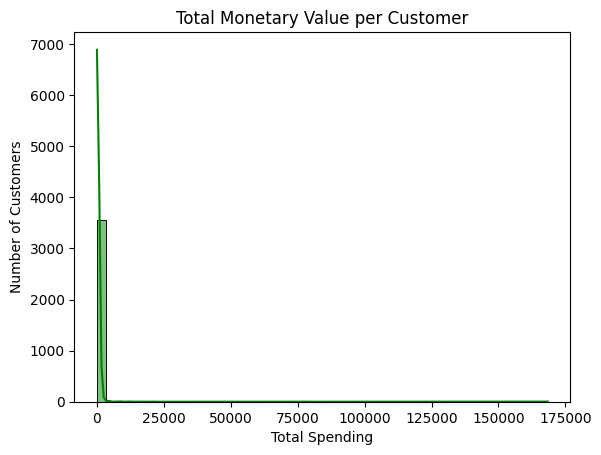

In [22]:
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()
sns.histplot(customer_spending, bins=50, kde=True, color='green')
plt.title("Total Monetary Value per Customer")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.show()

#  RFM Feature Engineering
      - Recency
      - Frequency
      - Monetary
It’s a classic customer segmentation model.

In [23]:
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

Finds the latest purchase date in your dataset.
Adds 1 day to it to simulate the "analysis date"

In [24]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate":lambda x : (ref_date - x.max()).days, "InvoiceNo" : "nunique",
    "Quantity" : lambda x : (x * df.loc[x.index, "UnitPrice"]).sum()
}).reset_index()

In [25]:
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

Standardize RFM

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

Elbow Method

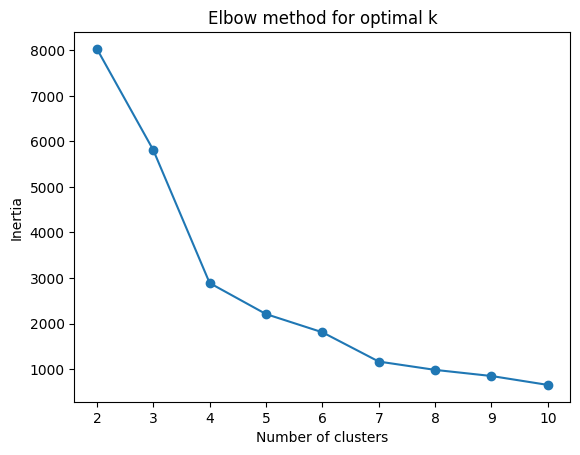

In [27]:
inertia = []
sil_scores = []
K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)
    sil_scores.append(silhouette_score(rfm_scaled, model.labels_))


plt.plot(K, inertia, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method for optimal k")
plt.show()


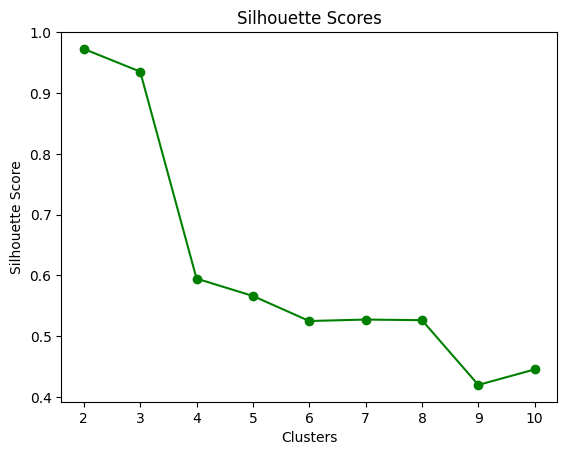

In [28]:
plt.plot(K, sil_scores, marker="o", color="green")
plt.title("Silhouette Scores")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Final Clustering

In [29]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

In [30]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,247.032227,1.444550,167.757214
1,1.000000,2.000000,168472.500000
2,1.200000,129.600000,11918.730000
3,45.143539,3.733201,302.499154


In [31]:
import pickle

Save KMeans and Scaler

In [32]:
with open("rfm_kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("rfm_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

Product Recommendation Matrix (Item-based)

In [33]:
product_df = df.groupby(["StockCode", "Description"])["Quantity"].sum().reset_index()
product_pivot = df.pivot_table(index="CustomerID", columns="Description", values="Quantity", aggfunc="sum").fillna(0)


In [34]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(product_pivot.T)

sim_df = pd.DataFrame(similarity_matrix, index=product_pivot.columns, columns=product_pivot.columns)


Save Recommendation Matrix

In [35]:
with open("product_similarity.pkl", "wb") as f:
    pickle.dump(sim_df, f)

Example

In [36]:
# Product Recommendation
def recommend_products(product_name, top_n=5):
    if product_name not in sim_df.columns:
        return ["Product not found."]
    similar_items = sim_df[product_name].sort_values(ascending=False)[1:top_n + 1]
    return similar_items.index.tolist()


In [37]:
# Cluster Prediction
def predict_cluster(r, f, m):
    x = scaler.transform([[r, f, m]])
    return kmeans.predict(x)[0]

In [38]:
print("Recommended for 'WHITE HANGING HEART T-LIGHT HOLDER':", recommend_products("WHITE HANGING HEART T-LIGHT HOLDER"))
print("Cluster Prediction for R=20, F=5, M=100:", predict_cluster(20, 5, 100))

Recommended for 'WHITE HANGING HEART T-LIGHT HOLDER': ['FELTCRAFT BUTTERFLY HEARTS', 'EDWARDIAN PARASOL PINK', 'RED HANGING HEART T-LIGHT HOLDER', 'EDWARDIAN PARASOL RED', 'HEART OF WICKER LARGE']
Cluster Prediction for R=20, F=5, M=100: 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
